# Étude statistique de l'output

On étudie ici les deux outputs du modèle LMM d'AXA

In [2]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from datetime import datetime

output1 = pd.read_csv('Databases/normal_implied_vol_010807.csv', delimiter = ";")
output1.fillna(0, inplace=True)

output2 = pd.read_csv('Databases/normal_implied_vol_300714.csv', delimiter = ";")
output2.fillna(0, inplace=True)



In [10]:
rng1 = pd.date_range('01/08/2007', periods=61, freq='M')
rng2 = pd.date_range('07/30/2014', periods=61, freq='M')
swaps = output1.columns[2:]


In [46]:
out1 = pd.DataFrame()
out2 = pd.DataFrame()

for swap in swaps:
    out1[swap] = 1000*output1[swap].groupby(output1.Timestep).mean()
    out2[swap] = 1000*output2[swap].groupby(output2.Timestep).mean()

out1['Date']=rng1
out2['Date']=rng2

out1 = out1.set_index('Date')
out2 = out2.set_index('Date')

out1 = out1.reset_index(level=['Date'])
out2 = out2.reset_index(level=['Date'])

In [24]:
recap_out1 = pd.DataFrame()
recap_out2 = pd.DataFrame()

for swap in swaps :
    recap_out1 = recap_out1.append(out1[swap].describe(percentiles = [.05, .25, .5, .75, .95]))
    recap_out2 = recap_out2.append(out2[swap].describe(percentiles = [.05, .25, .5, .75, .95]))
print("Première période : ")
print(recap_out1)
print("")
print("Deuxième période :")
print(recap_out2)

Première période : 
             25%        5%       50%       75%       95%  count       max  \
1to5    5.753369  5.651863  5.940392  6.175774  6.408388   61.0  6.469334   
1to10   5.617566  5.517950  5.801027  6.032437  6.262301   61.0  6.322927   
1to20   5.384633  5.295130  5.555760  5.772419  5.990761   61.0  6.049261   
5to5    5.963419  5.916925  6.077598  6.211753  6.344124   61.0  6.383632   
5to10   5.812891  5.768015  5.924937  6.055105  6.183023   61.0  6.220735   
5to20   5.523242  5.483983  5.625325  5.743064  5.856844   61.0  5.890372   
10to5   5.727292  5.698332  5.809505  5.901473  5.989759   61.0  6.016024   
10to10  5.544054  5.516490  5.622830  5.710605  5.794703   61.0  5.819780   
10to20  5.209765  5.185246  5.281857  5.361382  5.436604   61.0  5.459228   

            mean       min       std  
1to5    5.976806  5.628744  0.251738  
1to10   5.837193  5.495240  0.247566  
1to20   5.590830  5.274179  0.231532  
5to5    6.097562  5.903422  0.143502  
5to10   5.9438

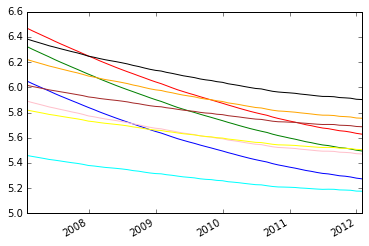

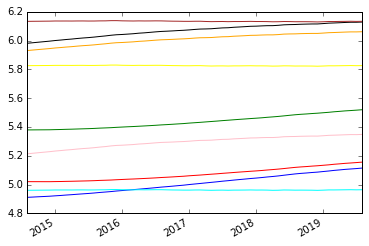

In [47]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']


fig, ax = plt.subplots()
for i in range(0,9) :
    ax.plot_date(out1['Date'], out1[swaps[i]],'-',color=colors[i])
    fig.autofmt_xdate()

plt.show()

fig, ax = plt.subplots()
for i in range(0,9) :
    ax.plot_date(out2['Date'], out2[swaps[i]],'-',color=colors[i])
    fig.autofmt_xdate()

plt.show()

In [17]:
#augmenter précision
def hist(table,swaps):
    for swap in swaps :
        print(swap)
        table[swap].hist()
        plt.show()

1to5


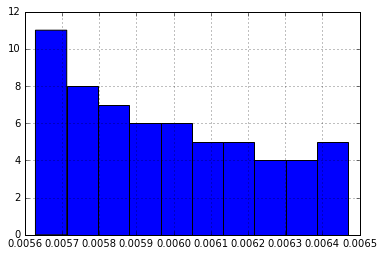

1to10


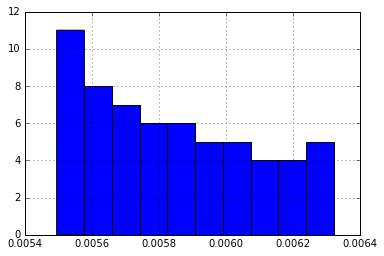

1to20


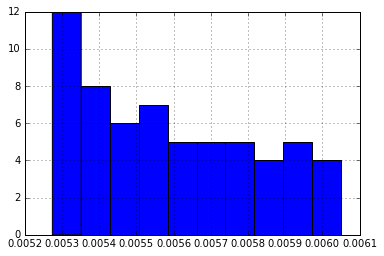

5to5


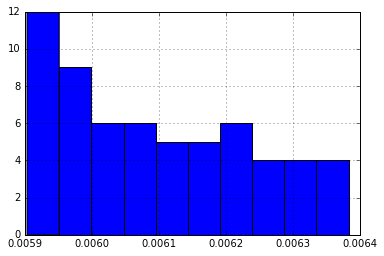

5to10


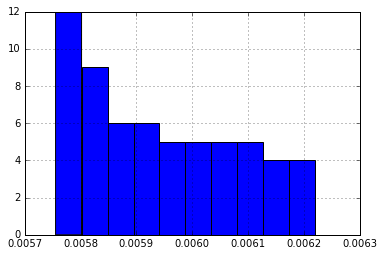

5to20


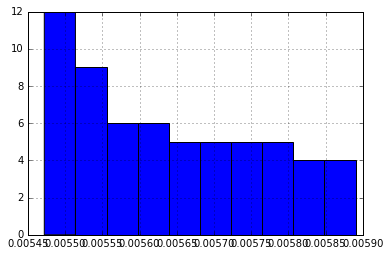

10to5


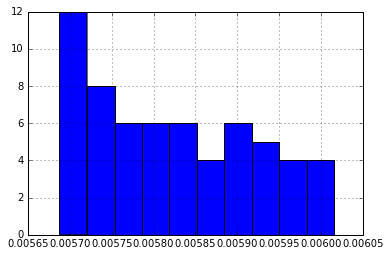

10to10


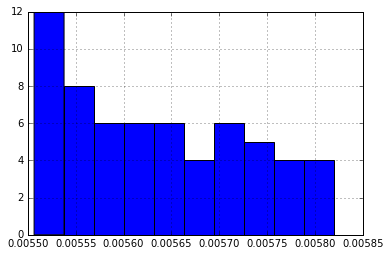

10to20


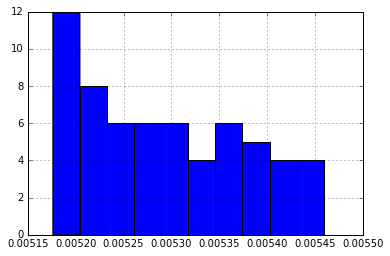

In [19]:
hist(out1,swaps)

1to5


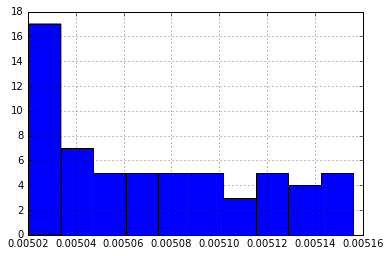

1to10


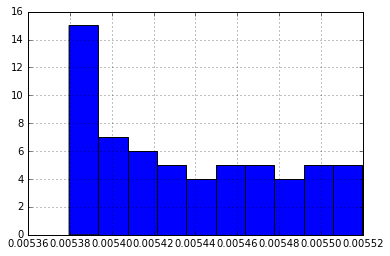

1to20


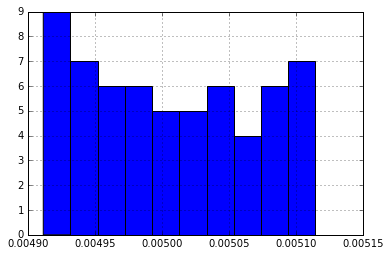

5to5


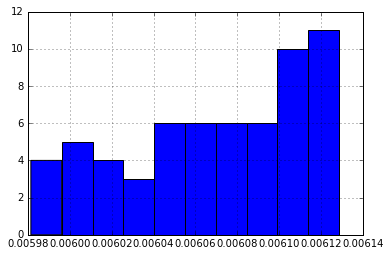

5to10


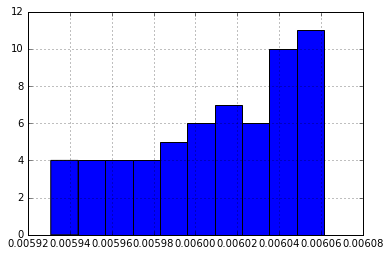

5to20


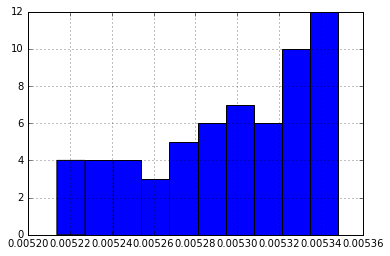

10to5


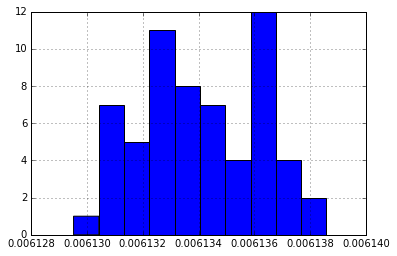

10to10


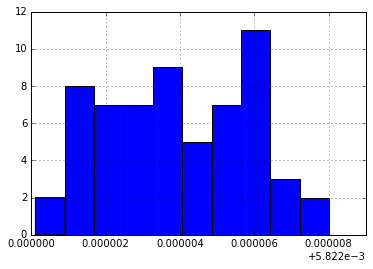

10to20


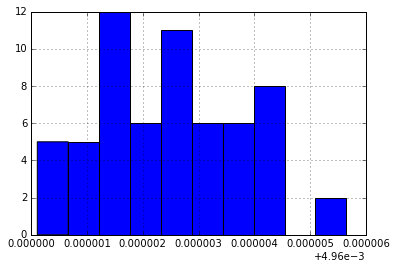

In [20]:
hist(out2,swaps)

In [22]:
def loi(table,loi='norm'):
    for i, elem in enumerate(table) :
        if i>0:
            test,p=stats.kstest(table[elem], loi)
            if p<0.05:
                print(str(elem)," ne suit pas une loi ",loi)
                
loi(out1,'expon')

1to10  ne suit pas une loi  expon
1to20  ne suit pas une loi  expon
5to5  ne suit pas une loi  expon
5to10  ne suit pas une loi  expon
5to20  ne suit pas une loi  expon
10to5  ne suit pas une loi  expon
10to10  ne suit pas une loi  expon
10to20  ne suit pas une loi  expon


TypeError: ufunc true_divide cannot use operands with types dtype('<M8[ns]') and dtype('int64')

Comme indiqué précedemment, on observe une forte corrélation entre les trajectoires des différents swaptions. On applique donc un test du khi-2 pour voir si les distributions suivent une même loi

Première période :
5to20  et  10to10  suivent la même loi, (p-valeur =  0.248040597677 )
5to20  :  GREEN
10to10  :  BLUE


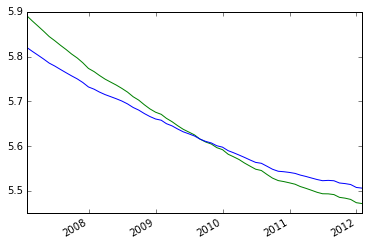

Deuxième période :


In [50]:

def corr(table):
    for i, elem in enumerate(table) :
        for j, ele in enumerate(table) :
            if i>0 and j>0 and i<j:
                test,p=stats.ks_2samp(table[elem], table[ele])
                if p<0.05:
                    pass
                    #print(str(elem),' et ',str(ele),' ne suivent pas la même loi')
                else : 
                    print(str(elem),' et ',str(ele),' suivent la même loi, (p-valeur = ',p,')')
                    fig, ax = plt.subplots()
                    print(str(elem),' : ',colors[1])
                    print(str(ele),' : ',colors[2])
                    ax.plot_date(table['Date'], table[elem],'-',color=colors[1])
                    ax.plot_date(table['Date'], table[ele],'-',color=colors[2])
                    fig.autofmt_xdate()
                    plt.show()

                    
print("Première période :")
corr(out1)
print("Deuxième période :")
corr(out2)